In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# خواندن داده‌ها
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
from sklearn.model_selection import train_test_split

# تقسیم داده‌ها به دو بخش آموزشی و تست

In [10]:
X = data.drop('output', axis=1)
y = data['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# استانداردسازی داده‌ها

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# پیش‌بینی برچسب داده‌های تست و محاسبه دقت الگوریتم
y_pred = knn.predict(X_test)


# accuracy

In [18]:
accuracy = accuracy_score(y_test, y_pred)

print(f'accuracy : {accuracy}')

accuracy : 0.9016393442622951


# f1-score

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score
f1 = f1_score(y_test, y_pred)
print(f'f1-score : {f1}')

f1-score : 0.9032258064516129


In [25]:
from sklearn.metrics import classification_report

In [26]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[27  2]
 [ 4 28]]


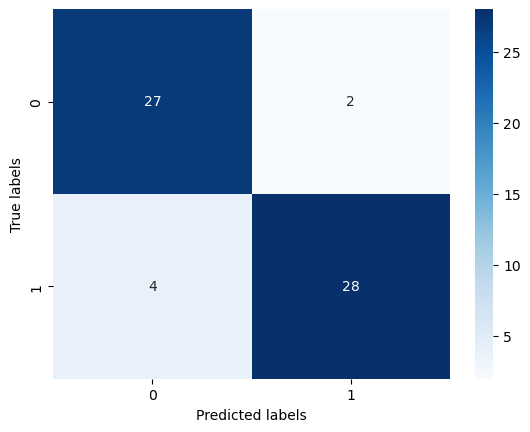

In [34]:
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# my f1-score is 90%

# ilya nozary